In [ ]:
import numpy as np

perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

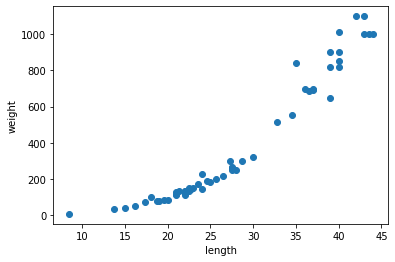

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(perch_length, perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

사이킷런에 사용할 훈련 세트는 2차원 배열이어야 한다. perch_length는 1차원 배열이므로 reshape() 함수를 사용하여 강제로 2차원 배열로 나누어주자.

In [ ]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state = 42)
train_input = train_input.reshape(-1, 1) # 크기에 -1을 지정하면 나머지 원소 개수로 모두 채우라는 의미
test_input = test_input.reshape(-1, 1)
print(train_input.shape, test_input.shape)

(42, 1) (14, 1)


#결정계수($R^2$)
---
분류의 경우는 kn.score로 출력되는 결과가 테스트 세트에 있는 샘플을 정확하게 분류한 개수의 비율이었다. 회귀에서는 임의의 수치를 사용하기 때문에 결정계수로 이를 판단한다. 결정계수 $R^2$은 $$R^2 = 1 - \frac{(타깃 - 예측)^2의 합}{(타깃 - 평균)^2의 합}$$ 으로 계산된다. 타깃이 평균 정도를 예측한다면 분자와 분모가 비슷해지므로 결정계수는 0에 가까워지고 예측이 타깃에 비슷해지면 1에 가까운 값이 된다.



In [ ]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor()
knr.fit(train_input, train_target)

print(knr.score(train_input, train_target), knr.score(test_input, test_target)) # 과소적합

0.9698823289099255 0.9928094061010639


In [ ]:
from sklearn.metrics import mean_absolute_error # 타깃과 예측의 절댓값 오차의 평균을 반환

test_prediction = knr.predict(test_input) # 테스트 세트에 대한 예측을 만든다.
mae = mean_absolute_error(test_target, test_prediction) # 테스트 세트에 대한 평균 절댓값 오차를 계산한다.
print(mae)

19.157142857142862


#과대적합 vs 과소적합
---
훈련 세트에서 높은 정확도를 보였는데 테스트 세트에서 정확도가 낮아졌다면 모델이 훈련 세트에 **과대적합(overfitting)** 되었다고 한다. 반대로 테스트 세트의 점수가 더 높거나, 두 점수 모두 낮은 경우 모델이 훈련 세트에 **과소적합(underfitting)** 되었다고 한다.

앞선 K-최근접 이웃 회귀로 평가한 훈련, 테스트 점수를 살펴보면, 테스트 점수가 더 높으므로 과소적합임을 알 수 있다. 모델을 조금 더 복잡하게, 즉 훈련 세트에 더 잘 맞도록 만들면 이를 해결할 수 있다. K-최근접 이웃 알고리즘에서는 이웃의 개수를 늘리면 데이터 전반에 있는 일반적인 패턴을 따르므로 k 값을 낮추어야 모델이 더욱 복잡해질 것이다.


In [ ]:
knr.n_neighbors = 3

knr.fit(train_input, train_target)
print(knr.score(train_input, train_target), knr.score(test_input, test_target)) # 과소적합 해결

0.9804899950518966 0.974645996398761


#K-최근접 이웃 회귀의 문제점
---
K-최근접 이웃 알고리즘은 주변 샘플들의 데이터를 평균하기 때문에, 훈련 세트 범위 밖의 샘플을 예측할 수 없다. 기존 샘플과 아무리 멀리 떨어져 있더라도 가장 가까운 샘플의 타깃을 평균하여 예측하기 때문에 값의 차이가 크게 난다.



In [ ]:
print(knr.predict([[50]])) # 길이가 50cm인 농어의 무게 예측 => 실제 측정값은 더 많이 나간다고 한다!

[1033.33333333]


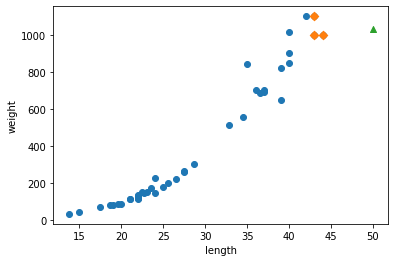

In [ ]:
distances, indexes = knr.kneighbors([[50]])

plt.scatter(train_input, train_target)
plt.scatter(train_input[indexes], train_target[indexes], marker = 'D') # 예측할 데이터의 이웃
plt.scatter(50, 1033, marker = '^') # 예측할 데이터
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [ ]:
print(np.mean(train_target[indexes])) # 50cm의 무게 예측값과 일치

1033.3333333333333


#선형 회귀
---
K-최근접 이웃 말고 다른 알고리즘으로 이 문제를 해결해보자! (다음 노트)

